In [1]:
# this notebook starts as duplicate of cust_analysis_4
# Lab results appended at bottom of cust_analysis_3 THIS TIME WITH MARKDOWN

In [2]:
# 1. Show the dataframe shape.
import pandas as pd
customers = pd.DataFrame(pd.read_csv('marketing_customer_analysis.csv'))
print('DF Customers:', customers.shape)

DF Customers: (9134, 24)


In [3]:
# 2. Standardize header names.
customers.columns = customers.columns.map(lambda x : x.replace("-", "_").replace(" ", "_"))
# still not satisfied with EmploymentStatus
customers = customers.rename(columns={"EmploymentStatus":"Employment_Status"})
customers.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'Employment_Status', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [4]:
# 3. Which columns are numerical?
num_cols = customers._get_numeric_data()
for col in num_cols:
    print(col)

Customer_Lifetime_Value
Income
Monthly_Premium_Auto
Months_Since_Last_Claim
Months_Since_Policy_Inception
Number_of_Open_Complaints
Number_of_Policies
Total_Claim_Amount


In [5]:
# 4. Which columns are categorical?
customers.select_dtypes('object').columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'Employment_Status', 'Gender', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [6]:
# 5. Check and deal with `NaN` values.
customers.isna().sum()
# let's see the relative 
round(customers.isna().sum()/len(customers),4)*100
# customers[customers['State'].isna()==True].head(60)    # test line to see some values
# I think > 5% is too high to just drop them based on NaN in State
# Decide to change them into generic USA --> next cell

Customer                         0.0
State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
Employment_Status                0.0
Gender                           0.0
Income                           0.0
Location_Code                    0.0
Marital_Status                   0.0
Monthly_Premium_Auto             0.0
Months_Since_Last_Claim          0.0
Months_Since_Policy_Inception    0.0
Number_of_Open_Complaints        0.0
Number_of_Policies               0.0
Policy_Type                      0.0
Policy                           0.0
Renew_Offer_Type                 0.0
Sales_Channel                    0.0
Total_Claim_Amount               0.0
Vehicle_Class                    0.0
Vehicle_Size                     0.0
dtype: float64

In [7]:
# 5. continue
# Fill State with USA
customers['State'] = customers['State'].fillna('USA')
# round(customers.isna().sum()/len(customers),4)*100

In [8]:
# 5. Continue with column Response
# customers[customers['Response'].isna()==True].head(60)    # test line to see some values
customers.loc[:,['Response']].head(60)
# Response seems to be boolean "Yes/No", with some empty fields. Looks like mostly the 
# same as previous customers without State. 
# I decide to fill the NaN with "No", since that sounds like least possible consequence
# and most common value
customers['Response'] = customers['Response'].fillna('No')

In [9]:
# 5. Continue with column Months_Since_Last_Claim
# pd.set_option('display.max_columns', None)    # see all columns, since Months_Since_Last_Claim was hidden
# customers[customers['Months_Since_Last_Claim'].isna()==False].head(60)    # test line to see some values
# Decide to fill Months_Since_Last_Claim with the average on total
# Determine average floating with one decimal
# import numpy
import numpy as np
mean_Months_Since_Last_Claim = round(customers['Months_Since_Last_Claim'].mean(),1)
mean_Months_Since_Last_Claim
customers['Months_Since_Last_Claim'] = customers['Months_Since_Last_Claim'].fillna(mean_Months_Since_Last_Claim)

In [10]:
# 5. Continue with column Number_of_Open_Complaints
# pd.set_option('display.max_columns', None)    # see all columns, since Months_Since_Last_Claim was hidden
# customers[customers['Number_of_Open_Complaints'].isna()==True].head(60)    # test line to see some values
# Decide to fill Number_of_Open_Complaints with mean value rounded whole numbers
mean_Number_of_Open_Complaints = round(customers['Number_of_Open_Complaints'].mean(),0)
mean_Number_of_Open_Complaints
customers['Number_of_Open_Complaints'] = customers['Number_of_Open_Complaints'].fillna(mean_Months_Since_Last_Claim)

In [11]:
# 5. Continue with column Vehicle_Class | Vehicle_Size | Vehicle_Type
# pd.set_option('display.max_columns', None)    # see all columns, since Months_Since_Last_Claim was hidden
# customers[customers['Vehicle_Size'].isna()==True].head(60)    # test line to see some values
# seems that all NaN on Class and Size are vehicle type A
# customers.loc[customers['Vehicle_Type'] == 'A']
# customers.loc[customers['Vehicle_Size'] == 'A']
# customers.loc[:,['Vehicle_Class','Vehicle_Size','Vehicle_Type']].head(60)
# Looking at Vehicle_Type seems that this field is really bad on data quality,
# since it's either A or NaN. It doesn't really give more or better info than Vehicle_Class 
# and Vehicle_Size together, therefore:
# Decide to eliminate column Vehicle_Type
customers = customers.drop(['Vehicle_Type'], axis=1)  # drop a single column 
# customers.head()

KeyError: "['Vehicle_Type'] not found in axis"

In [12]:
# 5. Continue with column Vehicle_Class | Vehicle_Size 
# pd.set_option('display.max_columns', None)    # see all columns, since Months_Since_Last_Claim was hidden
customers[customers['Vehicle_Class'].isna()==True].head(60)    # test line to see some values
# it seems like both columns have NaN together so I treat them equally
customers.loc[86:100,['Vehicle_Class','Vehicle_Size']].head(60)
# want to know most common Vehicle_Size
customers['Vehicle_Size'].unique()
# aparently 3 options L / M / S
customers['Vehicle_Size'].value_counts()
# decide to fill Vehicle_Size with Medsize
customers['Vehicle_Size'] = customers['Vehicle_Size'].fillna('Medsize')
customers['Vehicle_Class'].value_counts()
# decide to fill Vehicle_Size with Four-Door Car
customers['Vehicle_Class'] = customers['Vehicle_Class'].fillna('Four-Door Car')

In [13]:
# 5. Final check
round(customers.isna().sum()/len(customers),4)*100

Customer                         0.0
State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
Employment_Status                0.0
Gender                           0.0
Income                           0.0
Location_Code                    0.0
Marital_Status                   0.0
Monthly_Premium_Auto             0.0
Months_Since_Last_Claim          0.0
Months_Since_Policy_Inception    0.0
Number_of_Open_Complaints        0.0
Number_of_Policies               0.0
Policy_Type                      0.0
Policy                           0.0
Renew_Offer_Type                 0.0
Sales_Channel                    0.0
Total_Claim_Amount               0.0
Vehicle_Class                    0.0
Vehicle_Size                     0.0
dtype: float64

In [14]:
# 6. Datetime format - Extract the months from the dataset and store in a separate 
# column. Then filter the data to show only the information for the first quarter , 
# ie. January, February and March. _Hint_: If data from March does not exist, 
# consider only January and February.
pd.set_option('display.max_columns', None) 
customers.head()
# It looks like Effective_To_Date is the one I need (m/d/y) let's check it's type
# customers['Effective_To_Date'].dtypes
# so, it's not a date/time format, let's convert
customers['Effective_To_Date'] = pd.to_datetime(customers['Effective_To_Date'], errors='coerce')
customers['Effective_To_Date'].dtypes
# that worked '<M8[ns]' is is part of generic datetime64[ns]


dtype('<M8[ns]')

In [15]:
# 6. Continue
customers.head()
customers[customers['Effective_To_Date'].dt.quarter == 1] 
# aparently, in order to show first quarter no seperate column is needed

Customer       State  Customer_Lifetime_Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective_To_Date Employment_Status Gender  Income  \
0     Bachelor        2011-02-24          Employed      F   56274   
1     Bachelor        2011-01-31        Unemployed      F       0   
2     Bachelor        2011-02-19          Employed      F   48767   
3     Bachelor        2011-01-20        Unemployed      M       0   
4     Bachelor        2011-02-03          Employed      M   43836   
...        ...               ...               ...    ...     ...   
9129  Bachelor        2011-02-10          Employed      M   71941   
9130   College        2011-02-12          Employed      F   21604   
9131  Bachelor        2011-02-06        Unemployed      M       0   
9132   College        2011-02-03          Employed      M   21941   
9133   College        2011-02-14        Unemployed      M       0   

     Location_Code Marital_Status  Monthly_Premium_Auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number_of_Open_Complaints  Number_of_Policies     Policy_Type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0         

In [16]:
# 7. BONUS: Put all the previously mentioned data transformations into a function.
# no time for this, have to go to part 3

In [17]:
# Lab: Customer Analysis Round 3
# Show DataFrame info.
# Describe DataFrame.
# Show a plot of the total number of responses.
# Show a plot of the response rate by the sales channel.
# Show a plot of the response rate by the total claim amount.
# Show a plot of the response rate by income.

In [18]:
# Show DataFrame info.
customers.dtypes    # Or:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   Employment_Status              9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

In [19]:
# Describe DataFrame 
# directly:
# customers.describe().T   # transpose for readability
# customers.describe(include='all').T
# through variable with formatting:
summary = customers.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))

for col in summary.columns:
    summary[col] = summary[col].apply(lambda x : round(x, 2))
summary

count      mean       std      min      25%  \
Customer_Lifetime_Value        9134.0   8004.94   6870.97  1898.01  3994.25   
Income                         9134.0  37657.38  30379.90     0.00     0.00   
Monthly_Premium_Auto           9134.0     93.22     34.41    61.00    68.00   
Months_Since_Last_Claim        9134.0     15.10     10.07     0.00     6.00   
Months_Since_Policy_Inception  9134.0     48.06     27.91     0.00    24.00   
Number_of_Open_Complaints      9134.0      0.38      0.91     0.00     0.00   
Number_of_Policies             9134.0      2.97      2.39     1.00     1.00   
Total_Claim_Amount             9134.0    434.09    290.50     0.10   272.26   

                                    50%       75%       max       iqr  
Customer_Lifetime_Value         5780.18   8962.17  83325.38   4967.92  
Income                         33889.50  62320.00  99981.00  62320.00  
Monthly_Premium_Auto              83.00    109.00    298.00     41.00  
Months_Since_Last_Claim           14.00     23.00     35.00     17.00  
Months_Since_Policy_Inception     48.00     71.00     99.00     47.00  
Number_of_Open_Complaints          0.00      0.00      5.00      0.00  
Number_of_Policies                 2.00      4.00      9.00      3.00  
Total_Claim_Amount               383.95    547.51   2893.24    275.26

<AxesSubplot:>

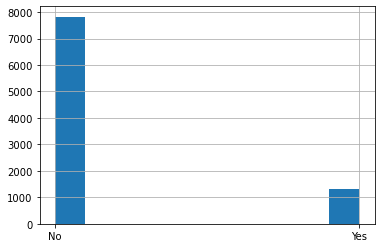

In [20]:
# Show a plot of the total number of responses.
# Unclear instruction: requirement is to show number of "Yes" responses next to 
# the "No" responses with numbers on y-axis
# installed seaborn first
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
# Since number of responses is a Yes or No I will plot that compared to each other
customers['Response'].hist()

<AxesSubplot:xlabel='Sales_Channel', ylabel='Count'>

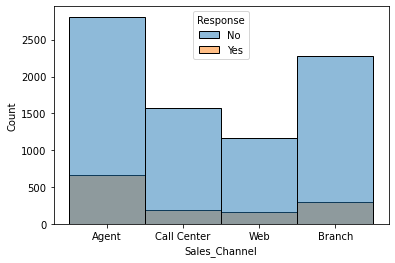

In [21]:
# Show a plot of the response rate by the sales channel.
# unclear instruction: interpretation required
# x-as number of responses per channel devided by Yes / No (Rate)
sns.histplot(data=customers, x='Sales_Channel', hue='Response', stat='count', cumulative=False)

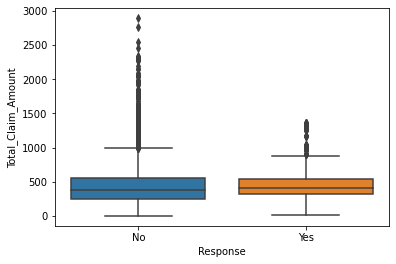

In [22]:
# Show a plot of the response rate by the total claim amount.
# unclear instruction: interpretation required
# Want to see by Claim Amount where Yes and No are --> boxplot
sns.boxplot(x = 'Response',y='Total_Claim_Amount', data=customers)
plt.show()

In [23]:
# Show a plot of the response rate by income.
# unclear instruction: interpretation required
# Interpretation
# Determine response Y/N rate per incomebox in python
# Make boxplot to get an idea of the distribution per income
# Make new dataframe/list as input for a stacked bar chart
# pd.set_option('display.max_columns', None) 
# customers
# sns.boxplot(x = 'Response',y='Income', data=customers)
# plt.show()
# conclusion boxplot: many 0-income on No response (unknown income)
# I consider 0-income as one of the income box, because 
# filtering out would effect the response rate too much
# I want to display response rate by:
# < 20000
# 20000 - 30000
# 30000 - 40000
# 40000 - 50000
# 50000 - 60000
# > 60000

# df.to_numpy().tolist()
# list.count(element)




# Cannot finish within time

# Start Lab | Customer Analysis Round 4

In [24]:
# Start Lab | Customer Analysis Round 4
# - Check the data types of the columns (1). Get the numeric data into dataframe called 
#   numerical (2) and categorical columns in a dataframe called categoricals (3). (You can use 
#   np.number and np.object to select the numerical data types and categorical data types 
#   respectively.
pd.set_option('display.max_columns', None)
# print(customers.dtypes)                                # instruction 1 done
numerical = customers._get_numeric_data()                # instruction 2 done
# cat_headers = customers.select_dtypes('object').columns
categorical = customers.select_dtypes(include=object)    # instruction 3 done
display(numerical.head(), categorical.head(), customers.dtypes)      

Customer_Lifetime_Value  Income  Monthly_Premium_Auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number_of_Open_Complaints  Number_of_Policies  Total_Claim_Amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

Customer       State Response  Coverage Education Employment_Status Gender  \
0  BU79786  Washington       No     Basic  Bachelor          Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor        Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor          Employed      F   
3  WW63253  California       No     Basic  Bachelor        Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor          Employed      M   

  Location_Code Marital_Status     Policy_Type        Policy Renew_Offer_Type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  Sales_Channel  Vehicle_Class Vehicle_Size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
Employment_Status                        object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                         object
Sales_Channel                           

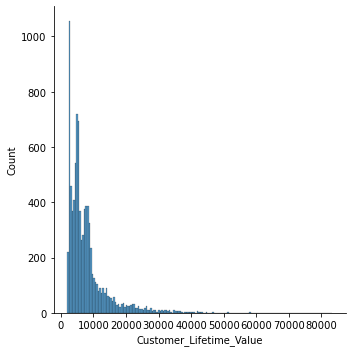

In [25]:
# Continue Lab | Customer Analysis Round 4
# - Now we will try to check the normality of the numerical variables visually
#    - Use seaborn library to construct distribution plots for the numerical variables
#    - Use Matplotlib to construct histograms
#    - Do the distributions for different numerical variables look like a normal distribution
#
# Customer_Lifetime_Value
sns.displot(customers['Customer_Lifetime_Value'])
plt.show()

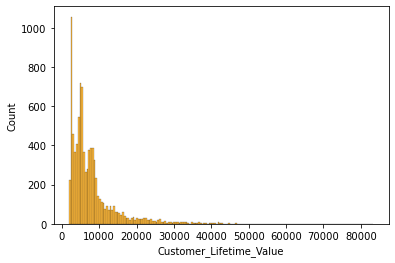

In [26]:
# Customer_Lifetime_Value
sns.histplot(customers['Customer_Lifetime_Value'], color="orange")
plt.show()

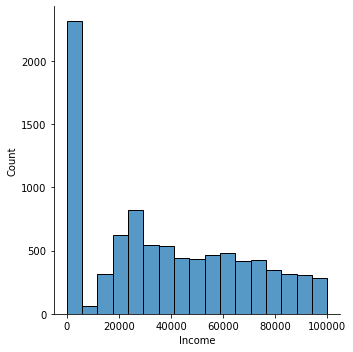

In [27]:
# Income
sns.displot(customers['Income'])
plt.show()

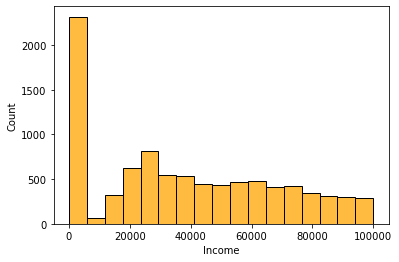

In [28]:
# Income
sns.histplot(customers['Income'], color="orange")
plt.show()

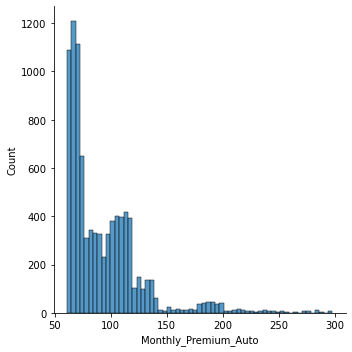

In [29]:
# Monthly_Premium_Auto
sns.displot(customers['Monthly_Premium_Auto'])
plt.show()

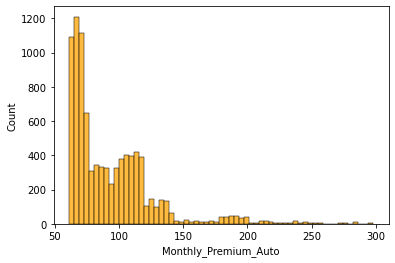

In [30]:
# Monthly_Premium_Auto
sns.histplot(customers['Monthly_Premium_Auto'], color="orange")
plt.show()

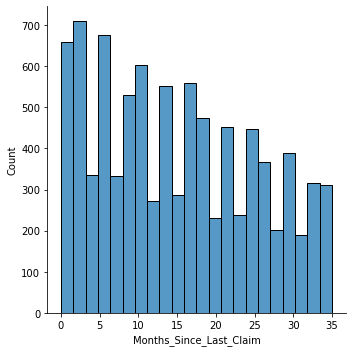

In [31]:
# Months_Since_Last_Claim
sns.displot(customers['Months_Since_Last_Claim'])
plt.show()

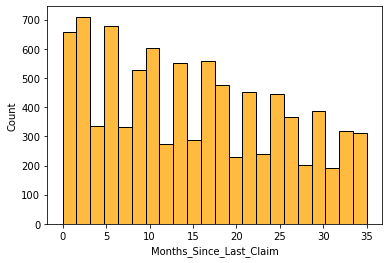

In [32]:
# Months_Since_Last_Claim
sns.histplot(customers['Months_Since_Last_Claim'], color="orange")
plt.show()

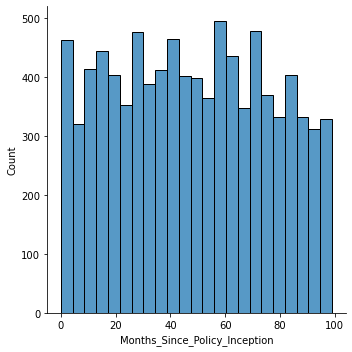

In [33]:
# Months_Since_Policy_Inception
sns.displot(customers['Months_Since_Policy_Inception'])
plt.show()

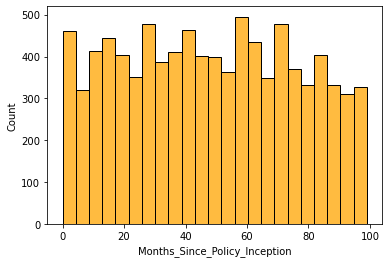

In [34]:
# Months_Since_Policy_Inception
sns.histplot(customers['Months_Since_Policy_Inception'], color="orange")
plt.show()

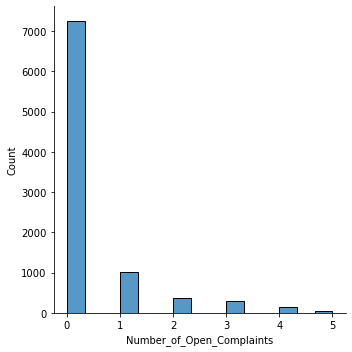

In [35]:
# Number_of_Open_Complaints
sns.displot(customers['Number_of_Open_Complaints'])
plt.show()

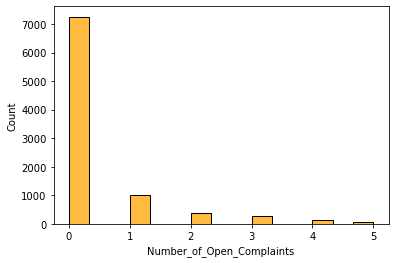

In [36]:
# Number_of_Open_Complaints
sns.histplot(customers['Number_of_Open_Complaints'], color="orange")
plt.show()

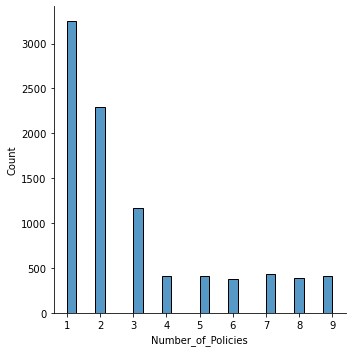

In [37]:
# Number_of_Policies
sns.displot(customers['Number_of_Policies'])
plt.show()

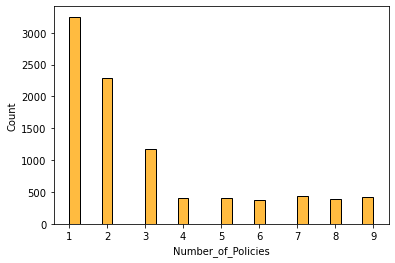

In [38]:
# Number_of_Policies
sns.histplot(customers['Number_of_Policies'], color="orange")
plt.show()

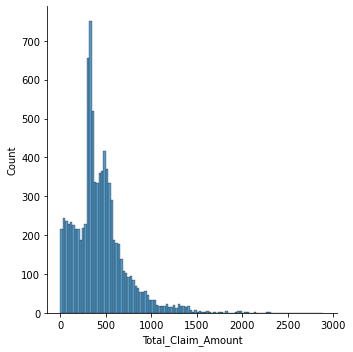

In [39]:
# Total_Claim_Amount
sns.displot(customers['Total_Claim_Amount'])
plt.show()

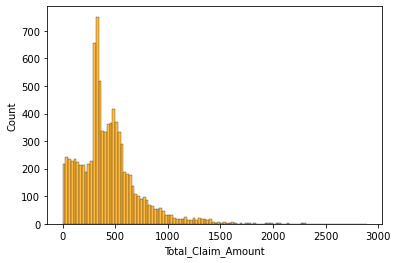

In [40]:
# Total_Claim_Amount
sns.histplot(customers['Total_Claim_Amount'], color="orange")
plt.show()

In [41]:
# Do the distributions for different numerical variables look like a normal distribution
# I would say, following seem to look like or nearly like normal distribution:
    # Customer_Lifetime_Value
    # Income
    # Monthly_Premium_Auto
    # Total_Claim_Amount

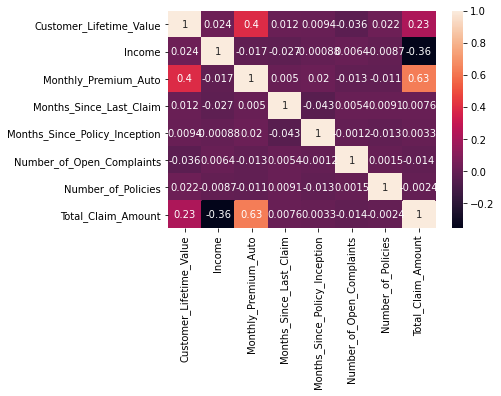

In [42]:
# Continue Lab | Customer Analysis Round 4
# - For the numerical variables, check the multicollinearity between the features. Please 
#   note that we will use the column total_claim_amount later as the target variable.
# multicollinearity: starting wth the heat map and draw some conclusions
correlations_matrix = customers.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# THIS IS PROBABLY THE MOST IMPORTANT LINE IN THIS NOTEBOOK
# the best variables are those that have a high correlation with the target 
# (you want to predict, always the y), but low correlation between themselves
    # zorg ervoor dat onderlinge hoge correlatie niet allebei tegelijk gebruikt, zit ook noise bij
    # welke hoge correlatie met output hebben is goed, maar weinig met onderlinge hoge correlatie

In [43]:
# Conclusions based on the correlation matrix:
# Some correlations that stand out:
    # Monthly_Premium_Auto <--> Customer_Lifetime_Value (0.4)
    # Monthly_Premium_Auto <--> Total_Claim_Amount (0.63)
    # total_claim_amount <--> Income (negative correlation -0.36)
# The rest seems to be neutral
# Regarding total_claim_amount it's interesting to study possibility
# to predict with the use of Monthly_Premium_Auto and Income

In [44]:
# Continue Lab | Customer Analysis Round 4
# - Drop one of the two features that show a high correlation between them (greater 
#   than 0.9). Write code for both the correlation matrix and for seaborn heatmap. 
#   If there is no pair of features that have a high correlation, then do not drop any 
#   features
# nothing to drop her, because highest corr is 0.63

# Start Lab | Customer Analysis Round 5

In [45]:
# Start Lab | Customer Analysis Round 5
    # X-y split - remove de outliers
    # Normalize (numerical).
# I'll take Total_Claim_Amount as example

In [46]:
# Monthly_Premium_Auto
# sns.boxplot(x=customers['Monthly_Premium_Auto'])
# plt.show()
# sns.displot(customers['Monthly_Premium_Auto'])
# plt.show()

In [47]:
print('Customers:', customers.shape)

Customers: (9134, 24)


In [48]:
# Removing outliers Monthly_Premium_Auto
# iqr = np.percentile(customers['Monthly_Premium_Auto'],75) - np.percentile(customers['Monthly_Premium_Auto'],25)
# upper_limit = np.percentile(customers['Monthly_Premium_Auto'],75) + 1.5*iqr
# lower_limit = np.percentile(customers['Monthly_Premium_Auto'],25) - 1.5*iqr
# display(iqr, lower_limit, upper_limit)

In [49]:
# Next line is to actually remove the outliers
# customers = customers[(customers['Monthly_Premium_Auto']>lower_limit) & (customers['Monthly_Premium_Auto']<upper_limit)]
# print('Customers without outliers in Monthly_Premium_Auto:', customers.shape)
# sns.displot(customers['Monthly_Premium_Auto'])
# plt.show()

In [50]:
# On closer inspection, however, these data do not provide a good normal 
# distribution. I try another: Total_Claim_Amount

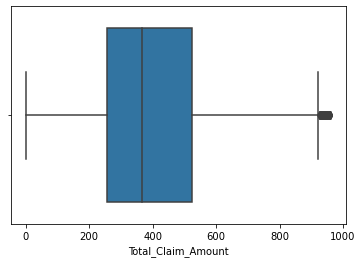

In [54]:
# Total_Claim_Amount
sns.boxplot(x=customers['Total_Claim_Amount'])
plt.show()
# sns.displot(customers['Total_Claim_Amount'])
# plt.show()

In [52]:
# Removing outliers Total_Claim_Amount
iqr = np.percentile(customers['Total_Claim_Amount'],75) - np.percentile(customers['Total_Claim_Amount'],25)
upper_limit = np.percentile(customers['Total_Claim_Amount'],75) + 1.5*iqr
lower_limit = np.percentile(customers['Total_Claim_Amount'],25) - 1.5*iqr
display(iqr, lower_limit, upper_limit)

275.25659425

-140.62664687499995

960.3997301249999

Customers without outliers in Total_Claim_Amount: (8681, 24)


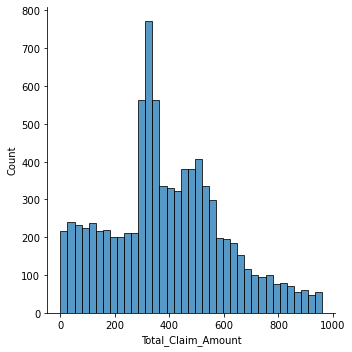

In [53]:
# Next line is to actually remove the outliers
customers = customers[(customers['Total_Claim_Amount']>lower_limit) & (customers['Total_Claim_Amount']<upper_limit)]
print('Customers without outliers in Total_Claim_Amount:', customers.shape)
sns.displot(customers['Total_Claim_Amount'])
plt.show()

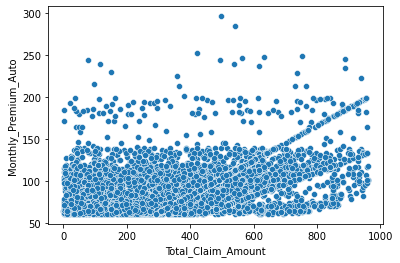

In [65]:
# Normalize Total_Claim_Amount
import matplotlib.pyplot as plt
# plt.scatter(x=customers['Total_Claim_Amount'], y=customers['Monthly_Premium_Auto'])
# plt.show()
sns.scatterplot(x=customers['Total_Claim_Amount'], y=customers['Monthly_Premium_Auto'])
plt.show()

In [64]:
# sns.pairplot(customers)
# plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# remove target from the columns
y = customers['Monthly_Premium_Auto']
X = customers.drop(['Monthly_Premium_Auto'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [75]:
# X_num  # column is out

In [79]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transform = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X_num.columns)

(8681, 7)


Customer_Lifetime_Value    Income  Months_Since_Last_Claim  \
0                    0.013112  0.562847                 0.914286   
1                    0.166483  0.487763                 0.514286   
2                    0.087076  0.000000                 0.514286   
3                    0.013872  0.438443                 0.342857   
4                    0.096324  0.629140                 0.400000   
...                       ...       ...                      ...   
8676                 0.325833  0.719547                 0.514286   
8677                 0.018157  0.216081                 0.400000   
8678                 0.094924  0.000000                 0.257143   
8679                 0.085237  0.219452                 0.971429   
8680                 0.010814  0.000000                 0.085714   

      Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                          0.050505                        0.0   
1                          0.383838                        0.0   
2                          0.656566                        0.0   
3                          0.444444                        0.0   
4                          0.949495                        0.0   
...                             ...                        ...   
8676                       0.898990                        0.0   
8677                       0.282828                        0.0   
8678                       0.373737                        0.6   
8679                       0.030303                        0.0   
8680                       0.909091                        0.0   

      Number_of_Policies  Total_Claim_Amount  
0                  0.000            0.400735  
1                  0.125            0.589962  
2                  0.750            0.551847  
3                  0.000            0.143781  
4                  0.125            0.165918  
...                  ...                 ...  
8676               0.125            0.206388  
8677               0.000            0.394890  
8678               0.125            0.823617  
8679               0.250            0.719885  
8680               0.000            0.384890  

[8681 rows x 7 columns]

In [77]:
# scaling standard scaler: make data normal distributed with mean=0 and std=1
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns)

(8681, 7)


Customer_Lifetime_Value    Income  Months_Since_Last_Claim  \
0                   -0.772891  0.580587                 1.684444   
1                    0.814984  0.332987                 0.294401   
2                   -0.007125 -1.275476                 0.294401   
3                   -0.765022  0.170350                -0.301332   
4                    0.088618  0.799196                -0.102754   
...                       ...       ...                      ...   
8676                 2.464757  1.097326                 0.294401   
8677                -0.720663 -0.562920                -0.102754   
8678                 0.074125 -1.275476                -0.599198   
8679                -0.026169 -0.551805                 1.883022   
8680                -0.796682 -1.275476                -1.194931   

      Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                         -1.542542                  -0.422343   
1                         -0.357794                  -0.422343   
2                          0.611544                  -0.422343   
3                         -0.142386                  -0.422343   
4                          1.652686                  -0.422343   
...                             ...                        ...   
8676                       1.473179                  -0.422343   
8677                      -0.716809                  -0.422343   
8678                      -0.393696                   2.863906   
8679                      -1.614344                  -0.422343   
8680                       1.509080                  -0.422343   

      Number_of_Policies  Total_Claim_Amount  
0              -0.821923           -0.024737  
1              -0.402260            0.835515  
2               1.696056            0.662240  
3              -0.821923           -1.192887  
4              -0.402260           -1.092248  
...                  ...                 ...  
8676           -0.402260           -0.908266  
8677           -0.821923           -0.051309  
8678           -0.402260            1.897744  
8679            0.017403            1.426161  
8680           -0.821923           -0.096769  

[8681 rows x 7 columns]